
# **Analysing and Predicting optimal locations for popular restaurants in Chennai city**

## Table of contents
* [Introduction](#introduction)
* [Problem Definition](#problem-def)
* [Data Acquisition](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Conclusion and Discussion](#conclusion)

## Introduction <a name="introduction"></a>

Chennai, also known as Madras, is the capital of the Indian state of Tamil Nadu. Located on the Coromandel Coast of the Bay of Bengal, it is one of the largest cultural, economic and educational centres of south India. According to the 2011 Indian census, it is the sixth-most populous city and fourth-most populous urban agglomeration in India. The Chennai Metropolitan Area is the 36th-largest urban area by population in the world. The traditional and de facto gateway of South India, Chennai is among the most-visited Indian cities by foreign tourists. It was ranked the 36th-most visited city in the world for the year 2019. The Quality of Living Survey rated Chennai as the safest city in India. Chennai has the fifth-largest urban economy of India.

The diversity of the cuisine available is reflective of the social and economic diversity of Chennai. Indian, Chinese, Asian, Italian, Middle Eastern, Thai are some of the most popular in the city. We will analyze each of these restaurant to predict a suitable location for the respective restaurant.

## Problem Definition <a name="problem-def"></a>

In this project, we will try to visualize all major parts and areas of the Chennai City and try to predict an optimal location for an each of the restaurant. Since there are lots of restaurants in Chennai, we try to select those locations that are not already crowded with restaurants within the region.

In particular, the concluded project report will target stakeholders who wants to set up one of the popular restaurant in Chennai, Tamil Nadu, India. We will use various data science and analysis techniques to reach our goal of selecting optimal locations. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data Acquisition <a name="data"></a>

The data and their respective data sources for our projects are discussed below,

1. Chennai city's major areas and neighbourhood

  **Data Source:** [Wikipedia](https://en.wikipedia.org/wiki/Areas_of_Chennai)

  **Data description:** We will initialize crawler to scrape and extract data and information about the areas and locality from the wikipedia web page.

2. Geographical coordinate of the areas

  **Data Source:** Python's [geocoder library](https://geocoder.readthedocs.io/index.html)

  **Data description:** Geocoder is a simple and consistent geocoding library written in Python. Dealing with multiple different geocoding provider such as Google, Bing, OSM and many more. Specifically, we will be using ArcGIS, as it is reliable and free.

3. To get nearby venues in each locality of Chennai city,

  **Data Source:** [Foursquare API](https://foursquare.com/)

  **Data description:** This API allows us to get information about all the venues in the neighbourhood of Chennai City. Foursquare Credentials is used to fetch the data.

### Importing necessary modules

In [ ]:
from collections import Counter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import pickle

### Web Scraping - Wikipedia

Wikipedia page has the neighborhood details. Using web scraping technique, we fetch the neighborhood details from the wiki page.

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://en.wikipedia.org/wiki/Areas_of_Chennai"

In [ ]:
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
areas = soup.find('table', {'class': 'wikitable'}).find_all('a')

### Geographical coordinates - Geocoder library

Geocoder is a simple and consistent geocoding library written in Python. Dealing with multiple different geocoding provider such as Google, Bing, OSM and many more. Specifically, we will be using ArcGIS, as it is reliable and free.

In [ ]:
!pip install geocoder -q
import geocoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 6.3 MB/s eta 0:00:00


In [ ]:
chennai_df = pd.DataFrame()
for i, neighbor in enumerate(areas):
  print('\rProcessing:', i+1, end="")
  record = [neighbor.text.strip()]
  record.extend(geocoder.arcgis(f'{record[0]}, Chennai, Tamil Nadu, India').latlng)
  chennai_df=chennai_df.append([record], ignore_index=True)

chennai_df.columns=['Neighborhood', 'Latitude', 'Longitude']
chennai_df.drop_duplicates('Neighborhood', inplace=True)
chennai_df.head()

Processing: 1

<ipython-input-6-85280009e6e8>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chennai_df=chennai_df.append([record], ignore_index=True)


Processing: 163

,Neighborhood,Latitude,Longitude
0,Adambakkam,12.99192,80.20603
1,Adyar,13.00303,80.25186
2,Alandur,13.00013,80.20051
3,Alapakkam,13.04611,80.16499
4,Alwarpet,13.03473,80.25415


In [ ]:
chennai_df.isna().sum()

Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

Save `chennai_df` dataframe to pickle file

In [ ]:
with open('chennai_df.pkl', 'wb') as f:
  pickle.dump(chennai_df, f)

Load `chennai_df` dataframe from pickle file

In [ ]:
with open("chennai_df.pkl", "rb") as f:
  chennai_df = pickle.load(f)

chennai_df.head()

,Neighborhood,Latitude,Longitude
0,Adambakkam,12.99192,80.20603
1,Adyar,13.00303,80.25186
2,Alandur,13.00013,80.20051
3,Alapakkam,13.04611,80.16499
4,Alwarpet,13.03473,80.25415


#### Vizualizing neigborhoods - Folium

Folium is a powerful data visualization library in Python that was built primarily to visualize geospatial data. With Folium, one can create a map of any location in the world if its latitude and longitude values are known.

In [ ]:
from geopy.geocoders import Nominatim

import folium
from folium.plugins import HeatMap

In [ ]:
address = 'Chennai, Tamil Nadu'
geolocator = Nominatim(user_agent="chennai_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chennai is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chennai is 13.035944350000001, 80.24099949725411.


In [ ]:
# create map of Chennai using latitude and longitude values
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=11)
folium.Marker([latitude, longitude], popup='Chennai').add_to(map_chennai)

# add markers to map
for lat, lng, neighborhood in zip(chennai_df['Latitude'], chennai_df['Longitude'], chennai_df['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)
    #folium.Circle([lat, lng], radius=1500, color='red', fill=True, fill_opacity=1).add_to(map_chennai)

map_chennai

### Fetching neighborhood venues - Foursquare API

Now that we have our location candidates, let's use Foursquare API to get info of all the venues in each of the neighborhood.

In [ ]:

CLIENT_ID = 'LVNSPMLTBBDPN2INEYVDDVFWLONMFATTHN1UXOKODIXDTMZA' # your Foursquare ID
CLIENT_SECRET = 'UU3FWAT2QOHGJHGYAGR54F5GFB4NJZFNDITCJZUTFCNW2OYI' # your Foursquare Secret
VERSION = 20230610 # Foursquare API version

print('Credentials Stored')

Credentials Stored


Define a function `getNearbyVenues`, to extract useful information using Foursquare API service.

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):

    venues_list=[]
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 1000 # define radius
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude',
                  'Neighborhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']

    return(nearby_venues)

In [ ]:
chennai_venues = getNearbyVenues(names=chennai_df['Neighborhood'],
                                latitudes=chennai_df['Latitude'],
                                longitudes=chennai_df['Longitude'],
                                radius=1500)
chennai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.99192,80.20603,Pizza Republic,12.990987,80.198613,Pizza Place
1,Adambakkam,12.99192,80.20603,Sukkkubai Beef Biryani Shop,12.998769,80.201381,Indian Restaurant
2,Adambakkam,12.99192,80.20603,St Thomas Mount Railway Station,12.994987,80.200302,Train Station
3,Adambakkam,12.99192,80.20603,Loiee,12.992197,80.199000,Bakery
4,Adambakkam,12.99192,80.20603,Venkateshwara Super Market,12.986320,80.205168,Department Store


In [ ]:
chennai_venues.shape

(2189, 7)

In [ ]:
chennai_venues.drop_duplicates(["Venue", "Venue Latitude", "Venue Longitude"], inplace=True, ignore_index=True)
chennai_venues.shape

(1658, 7)

Save `chennai_venues` dataframe to pickle file

In [ ]:
with open('chennai_venues.pkl', 'wb') as f:
  pickle.dump(chennai_venues, f)

Load `chennai_venues` dataframe from pickle file

In [ ]:
with open('chennai_venues.pkl', 'rb') as f:
  chennai_venues = pickle.load(f)

chennai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.99192,80.20603,Pizza Republic,12.990987,80.198613,Pizza Place
1,Adambakkam,12.99192,80.20603,Sukkkubai Beef Biryani Shop,12.998769,80.201381,Indian Restaurant
2,Adambakkam,12.99192,80.20603,St Thomas Mount Railway Station,12.994987,80.200302,Train Station
3,Adambakkam,12.99192,80.20603,Loiee,12.992197,80.199000,Bakery
4,Adambakkam,12.99192,80.20603,Venkateshwara Super Market,12.986320,80.205168,Department Store


In [ ]:
chennai_venues.groupby('Neighborhood').count()[['Venue']].head()

,Venue
Neighborhood,
Adambakkam,8
Adyar,71
Alandur,12
Alapakkam,8
Alwarpet,68


In [ ]:
print('There are {} uniques categories.'.format(len(chennai_venues['Venue Category'].unique())))

There are 204 uniques categories.


#### Vizualizing restaurants - Folium

Filter out only the restaurant from all the venues

In [ ]:
restaurant = ['restaurant', 'diner', 'taverna', 'steakhouse']

chennai_restaurant = chennai_venues[[np.any([r in x.lower() for r in restaurant]) for x in chennai_venues['Venue Category']]].reset_index(drop=True)
chennai_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.99192,80.20603,Sukkkubai Beef Biryani Shop,12.998769,80.201381,Indian Restaurant
1,Adyar,13.00303,80.25186,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
2,Adyar,13.00303,80.25186,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
3,Adyar,13.00303,80.25186,Wonton,13.005047,80.251690,Chinese Restaurant
4,Adyar,13.00303,80.25186,Anjappar,13.006757,80.250713,Indian Restaurant


Save `chennai_restaurant` dataframe to pickle file

In [ ]:
with open('chennai_restaurant.pkl', 'wb') as f:
  pickle.dump(chennai_restaurant, f)

Load `chennai_restaurant` dataframe from pickle file

In [ ]:
with open('chennai_restaurant.pkl', 'rb') as f:
  chennai_restaurant = pickle.load(f)

chennai_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.99192,80.20603,Sukkkubai Beef Biryani Shop,12.998769,80.201381,Indian Restaurant
1,Adyar,13.00303,80.25186,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
2,Adyar,13.00303,80.25186,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
3,Adyar,13.00303,80.25186,Wonton,13.005047,80.251690,Chinese Restaurant
4,Adyar,13.00303,80.25186,Anjappar,13.006757,80.250713,Indian Restaurant


Percentage of each of the restaurant type

In [ ]:
chennai_restaurant.groupby("Venue Category").count()["Venue"].sort_values(ascending=False) / len(chennai_restaurant) * 100

Venue Category
Indian Restaurant                  41.710297
Fast Food Restaurant                9.424084
Vegetarian / Vegan Restaurant       7.853403
Chinese Restaurant                  7.504363
Restaurant                          6.631763
South Indian Restaurant             4.537522
Asian Restaurant                    3.839442
Italian Restaurant                  3.839442
Middle Eastern Restaurant           2.792321
Diner                               1.047120
Japanese Restaurant                 0.698080
Multicuisine Indian Restaurant      0.698080
Thai Restaurant                     0.698080
American Restaurant                 0.698080
Seafood Restaurant                  0.523560
North Indian Restaurant             0.523560
Modern European Restaurant          0.523560
Kerala Restaurant                   0.523560
Comfort Food Restaurant             0.523560
Korean Restaurant                   0.349040
Mediterranean Restaurant            0.349040
Mexican Restaurant                  0.34

Some of most popular restaurant type are,

1. Indian Restaurant
2. Fast Food Restaurant
3. Vegetarian Restaurant
4. Chinese Restaurant
5. General Restaurant
6. Asian Restaurant
7. Italian Restaurant

In [ ]:
target_restaurant = ["Indian Restaurant", "Fast Food Restaurant", "Vegetarian / Vegan Restaurant", "Chinese Restaurant", "Asian Restaurant", "Italian Restaurant"]

Vizualizing Indian Restaurant vs other Restaurant

In [ ]:
# create map of Chennai using latitude and longitude values
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=11)
folium.Marker([latitude, longitude], popup="Chennai city").add_to(map_chennai)

# add markers to map
for lat, lng, category in zip(chennai_restaurant['Neighborhood Latitude'], chennai_restaurant['Neighborhood Longitude'], chennai_restaurant['Venue Category']):
    label = folium.Popup(category, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue' if category == "Indian Restaurant" else "red",
        fill=True,
        fill_opacity=1,
        parse_html=False).add_to(map_chennai)

map_chennai

Indian restaurant only constitute ~42% of all the restaurant in the city of Chennai.

## Methodology <a name="methodology"></a>

In this project, we use clustering algorithm like `KMeans` to cluster the neighborhood based on the venue frequency and analyze each cluster to select the optimal location for each of the restaurant type.

Previously, we have already collected the required data, from various data sources like Wikipedia, Geocoder, Foursquare API service. We have also filtered all the restaurant type from the venues.

Next, we will analyze each of the popular restaurant type and explore the 'restaurant density' across the areas of Chennai city. We will be using Heatmaps to identify few promising areas with low number of restaurants in general and no popular restaurant type within the vicinity.

We will also cluster the neighborhood based on the general venue frequency and compare the sets in each cluster to conclude the most promising and optimal location for each of the restaurant type.

In [ ]:
map_chennai = folium.Map([lat, lng], zoom_start=11)
folium.Marker([latitude, longitude], popup="Chennai city").add_to(map_chennai)

HeatMap(chennai_restaurant[["Venue Latitude", "Venue Longitude"]].to_numpy()).add_to(map_chennai)

map_chennai

## Analysis <a name="analysis"></a>

First, we need to cluster the neighborhoods and then analyze each of the clusters. The results will allow us to identify similar neighbourhoods with the concentration of Restaurants type. Based on the occurrence of these restaurants type in different neighbourhoods, we will try to answer the question as to which neighbourhoods are most suitable to open the respective restaurants. In particular, we will target those neighborhood that has less than 20% of the restaurant and no target restaurant.

We will use One-Hot encoding which allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. In our case, venue category are expressed as the mean of the frequency of occurrence of each category.

In [ ]:
chennai_onehot = pd.get_dummies(chennai_venues[['Venue Category']], prefix="", prefix_sep="")
chennai_onehot['Neighborhood'] = chennai_venues['Neighborhood']
fixed_columns = ['Neighborhood'] + list(chennai_onehot.columns.drop('Neighborhood'))
chennai_onehot = chennai_onehot[fixed_columns]

chennai_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Watch Shop,Whisky Bar,Women's Store,Yoga Studio,Zoo Exhibit
0,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
chennai_onehot.shape

(1658, 205)

In [ ]:
chennai_density = chennai_onehot.groupby('Neighborhood').mean().reset_index()
chennai_density.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Watch Shop,Whisky Bar,Women's Store,Yoga Studio,Zoo Exhibit
0,Adambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.125,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.028169,0.0,0.0,0.014085,0.0,0.014085,0.0,0.0
2,Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Alwarpet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.014706,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
chennai_density.shape

(153, 205)

Save `chennai_grouped` dataframe to pickle file

In [ ]:
with open('chennai_density.pkl', 'wb') as f:
  pickle.dump(chennai_density, f)

Load `chennai_grouped` dataframe from pickle file

In [ ]:
with open('chennai_density.pkl', 'rb') as f:
  chennai_density = pickle.load(f)

chennai_density.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Andhra Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Watch Shop,Whisky Bar,Women's Store,Yoga Studio,Zoo Exhibit
0,Adambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.125,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.028169,0.0,0.0,0.014085,0.0,0.014085,0.0,0.0
2,Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Alwarpet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.014706,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


Create a new dataframe to display the top 10 venues for each neighborhood. We will utilize the below function to achieve our task.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_density['Neighborhood']

for ind in np.arange(chennai_density.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_density.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Hotel,Department Store,Supermarket,Metro Station,Train Station,Bakery,Pizza Place,Indian Restaurant,Multicuisine Indian Restaurant,Multiplex
1,Adyar,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Rock Club,Ice Cream Shop,North Indian Restaurant,Bookstore
2,Alandur,Indian Restaurant,Church,Hotel Bar,Burger Joint,Multiplex,Café,Metro Station,Bakery,Hotel,Breakfast Spot
3,Alapakkam,Fast Food Restaurant,Sandwich Place,Bakery,Department Store,Asian Restaurant,Clothing Store,Chettinad Restaurant,Museum,Music School,Music Store
4,Alwarpet,Indian Restaurant,Café,Italian Restaurant,Restaurant,Hotel,Coffee Shop,Bakery,Chinese Restaurant,Dessert Shop,Japanese Restaurant


### Clustering neighbors

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_density.drop("Neighborhood", 1))
np.unique(kmeans.labels_, return_counts=True)

<ipython-input-179-9ff5f0415e1b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_density.drop("Neighborhood", 1))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3], dtype=int32), array([  5, 103,  42,   3]))

In [ ]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:
chennai_merged = chennai_df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner').reset_index(drop=True)

chennai_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,12.99192,80.20603,1,Hotel,Department Store,Supermarket,Metro Station,Train Station,Bakery,Pizza Place,Indian Restaurant,Multicuisine Indian Restaurant,Multiplex
1,Adyar,13.00303,80.25186,2,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Rock Club,Ice Cream Shop,North Indian Restaurant,Bookstore
2,Alandur,13.00013,80.20051,1,Indian Restaurant,Church,Hotel Bar,Burger Joint,Multiplex,Café,Metro Station,Bakery,Hotel,Breakfast Spot
3,Alapakkam,13.04611,80.16499,1,Fast Food Restaurant,Sandwich Place,Bakery,Department Store,Asian Restaurant,Clothing Store,Chettinad Restaurant,Museum,Music School,Music Store
4,Alwarpet,13.03473,80.25415,1,Indian Restaurant,Café,Italian Restaurant,Restaurant,Hotel,Coffee Shop,Bakery,Chinese Restaurant,Dessert Shop,Japanese Restaurant


Save `chennai_merged` dataframe to pickle file

In [ ]:
with open('chennai_merged.pkl', 'wb') as f:
  pickle.dump(chennai_merged, f)

Load `chennai_merged` dataframe from pickle file

In [ ]:
with open('chennai_merged.pkl', 'rb') as f:
  chennai_merged = pickle.load(f)

chennai_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,12.99192,80.20603,1,Hotel,Department Store,Supermarket,Metro Station,Train Station,Bakery,Pizza Place,Indian Restaurant,Multicuisine Indian Restaurant,Multiplex
1,Adyar,13.00303,80.25186,2,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Rock Club,Ice Cream Shop,North Indian Restaurant,Bookstore
2,Alandur,13.00013,80.20051,1,Indian Restaurant,Church,Hotel Bar,Burger Joint,Multiplex,Café,Metro Station,Bakery,Hotel,Breakfast Spot
3,Alapakkam,13.04611,80.16499,1,Fast Food Restaurant,Sandwich Place,Bakery,Department Store,Asian Restaurant,Clothing Store,Chettinad Restaurant,Museum,Music School,Music Store
4,Alwarpet,13.03473,80.25415,1,Indian Restaurant,Café,Italian Restaurant,Restaurant,Hotel,Coffee Shop,Bakery,Chinese Restaurant,Dessert Shop,Japanese Restaurant


In [ ]:
chennai_density = chennai_df.join(chennai_density.set_index('Neighborhood'), on='Neighborhood', how='inner').reset_index(drop=True)
chennai_density.insert(3, 'Cluster Labels', kmeans.labels_)

chennai_density.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Watch Shop,Whisky Bar,Women's Store,Yoga Studio,Zoo Exhibit
0,Adambakkam,12.99192,80.20603,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.125,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Adyar,13.00303,80.25186,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.028169,0.0,0.0,0.014085,0.0,0.014085,0.0,0.0
2,Alandur,13.00013,80.20051,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,Alapakkam,13.04611,80.16499,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Alwarpet,13.03473,80.25415,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.014706,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
chennai_restaurant_density = chennai_density[['Neighborhood', 'Latitude', 'Longitude', 'Cluster Labels']+ list(chennai_restaurant['Venue Category'].unique())]

chennai_restaurant_density.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant,Vegetarian / Vegan Restaurant,North Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,...,Southern / Soul Food Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Curry Restaurant,Portuguese Restaurant,Hyderabadi Restaurant,Andhra Restaurant,Rajasthani Restaurant,Steakhouse,Russian Restaurant
0,Adambakkam,12.99192,80.20603,1,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adyar,13.00303,80.25186,2,0.225352,0.028169,0.028169,0.042254,0.042254,0.014085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alandur,13.00013,80.20051,1,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alapakkam,13.04611,80.16499,1,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alwarpet,13.03473,80.25415,1,0.088235,0.014706,0.000000,0.044118,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Save `chennai_restaurant_density` dataframe to pickle file

In [ ]:
with open('chennai_restaurant_density.pkl', 'wb') as f:
  pickle.dump(chennai_restaurant_density, f)

Load `chennai_restaurant_density` dataframe from pickle file

In [ ]:
with open('chennai_restaurant_density.pkl', 'rb') as f:
  chennai_restaurant_density = pickle.load(f)

chennai_restaurant_density.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant,Vegetarian / Vegan Restaurant,North Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,...,Southern / Soul Food Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Curry Restaurant,Portuguese Restaurant,Hyderabadi Restaurant,Andhra Restaurant,Rajasthani Restaurant,Steakhouse,Russian Restaurant
0,Adambakkam,12.99192,80.20603,1,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adyar,13.00303,80.25186,2,0.225352,0.028169,0.028169,0.042254,0.042254,0.014085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alandur,13.00013,80.20051,1,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alapakkam,13.04611,80.16499,1,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alwarpet,13.03473,80.25415,1,0.088235,0.014706,0.000000,0.044118,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color for the clusters
color = ["red", "green", "blue", "darkgoldenrod"]

# add markers to the map
folium.Marker([latitude, longitude], popup="Chennai city").add_to(map_clusters)
markers_colors = []
for lat, lon, poi, cluster in zip(chennai_merged['Latitude'], chennai_merged['Longitude'], chennai_merged['Neighborhood'], chennai_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=color[cluster],
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)

# Add Categorical Legend
legend_html = """
<div style="position:fixed;
    background: white;
    top: 10px;
    right: 10px;
    width: 100px;
    height: 85px;
    border:2px solid grey;
    z-index: 9999;
    font-size:14px;">
    &nbsp;<i class="fa fa-circle fa-1x" style="color:{}"></i>&nbsp;Cluster 0<br>
    &nbsp;<i class="fa fa-circle fa-1x" style="color:{}"></i>&nbsp;Cluster 1<br>
    &nbsp;<i class="fa fa-circle fa-1x" style="color:{}"></i>&nbsp;Cluster 2<br>
    &nbsp;<i class="fa fa-circle fa-1x" style="color:{}"></i>&nbsp;Cluster 3
</div>""".format(*color)
map_clusters.get_root().html.add_child(folium.Element(legend_html))

map_clusters

Each of the clusters are analyzed separately to find the opportunity of opening a new restaurant with respect to each type, within each of the cluster. Each of the clusters are thoroughly examined to uncover some useful insights about the restaurant and general venue density. The analyses are discussed as follows,

#### Cluster 0

In [ ]:
cluster0 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 0].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster0

<ipython-input-189-198ca3ea7276>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster0 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 0].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ennore,ATM,Train Station,New American Restaurant,Molecular Gastronomy Restaurant,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School
1,Kattivakkam,Train Station,ATM,New American Restaurant,Molecular Gastronomy Restaurant,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School
2,Nemilichery,Train Station,Coffee Shop,ATM,North Indian Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store
3,Pattaravakkam,Train Station,ATM,New American Restaurant,Molecular Gastronomy Restaurant,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School
4,Washermanpet,Department Store,Train Station,ATM,Nightclub,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School


In [ ]:
Counter(cluster0.to_numpy().flatten()).most_common(10)

[('ATM', 5),
 ('Train Station', 5),
 ('Movie Theater', 5),
 ('Multicuisine Indian Restaurant', 5),
 ('Multiplex', 5),
 ('Museum', 5),
 ('Music School', 5),
 ('Motel', 4),
 ('New American Restaurant', 3),
 ('Molecular Gastronomy Restaurant', 3)]

Cluster 0 has negligible restaurant density. Opening a new restaurant in this cluster can be profitable

In [ ]:
cluster0_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 0].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster0_restaurant.insert(1, 'Restaurant fraction', cluster0_restaurant.sum(axis=1))

cluster0_restaurant

<ipython-input-191-2e1174fac99e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster0_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 0].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
<ipython-input-191-2e1174fac99e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster0_restaurant.insert(1, 'Restaurant fraction', cluster0_restaurant.sum(axis=1))


,Neighborhood,Restaurant fraction,Indian Restaurant,Vegetarian / Vegan Restaurant,North Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant,Asian Restaurant,...,Southern / Soul Food Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Curry Restaurant,Portuguese Restaurant,Hyderabadi Restaurant,Andhra Restaurant,Rajasthani Restaurant,Steakhouse,Russian Restaurant
0,Eranavur,0.25,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kattupakkam,1.00,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Nemilichery,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Pattaravakkam,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Washermanpet,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Target Restaurant

In [ ]:
cluster0_restaurant[['Neighborhood', 'Restaurant fraction'] + target_restaurant]

,Neighborhood,Restaurant fraction,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
0,Eranavur,0.25,0.0,0.0,0.0,0.25,0.0,0.0
1,Kattupakkam,1.00,1.0,0.0,0.0,0.00,0.0,0.0
2,Nemilichery,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,Pattaravakkam,0.00,0.0,0.0,0.0,0.00,0.0,0.0
4,Washermanpet,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [ ]:
cluster0_restaurant[target_restaurant].mean()

Indian Restaurant                0.20
Fast Food Restaurant             0.00
Vegetarian / Vegan Restaurant    0.00
Chinese Restaurant               0.05
Asian Restaurant                 0.00
Italian Restaurant               0.00
dtype: float64

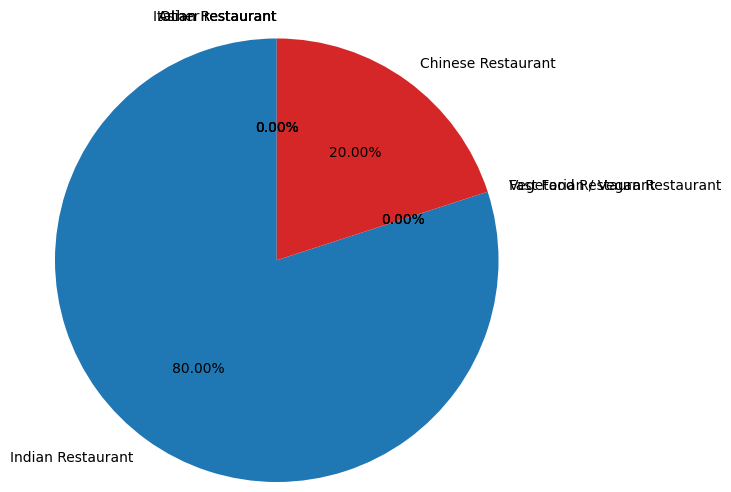

In [ ]:
x = np.append(cluster0_restaurant[target_restaurant].sum().values, cluster0_restaurant['Restaurant fraction'].sum()-cluster0_restaurant[target_restaurant].sum().sum())
labels = np.append(cluster0_restaurant[target_restaurant].sum().index, 'Other restaurant')
plt.pie(x=x, labels=labels, radius=1.5, startangle=90, autopct="%.2f%%");

Based on the above data, the following insights are concluded. We will target only the neighborhood with less than 20% of restaurant - suitable for opening any type of restaurant, but not already established restaurant,

**Any type of restaurant** (preferably indian and chinese)
  * Nemilichery
  * Pattaravakkam
  * Washermanpet

This cluster has no Fast Food restaurant, Italian restaurant and Asian restaurant. Opening these type of restaurant is done after properly analyzing the area and people.

#### Cluster 1

In [ ]:
cluster1 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 1].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster1

<ipython-input-195-a7f6678840c9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster1 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 1].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Hotel,Department Store,Supermarket,Metro Station,Train Station,Bakery,Pizza Place,Indian Restaurant,Multicuisine Indian Restaurant,Multiplex
1,Alandur,Indian Restaurant,Church,Hotel Bar,Burger Joint,Multiplex,Café,Metro Station,Bakery,Hotel,Breakfast Spot
2,Alapakkam,Fast Food Restaurant,Sandwich Place,Bakery,Department Store,Asian Restaurant,Clothing Store,Chettinad Restaurant,Museum,Music School,Music Store
3,Alwarpet,Indian Restaurant,Café,Italian Restaurant,Restaurant,Hotel,Coffee Shop,Bakery,Chinese Restaurant,Dessert Shop,Japanese Restaurant
4,Alwarthirunagar,Fast Food Restaurant,Clothing Store,Movie Theater,Gym,Chettinad Restaurant,Chinese Restaurant,Multiplex,Café,Tea Room,Pizza Place
...,...,...,...,...,...,...,...,...,...,...,...
98,Vandalur,Cafeteria,South Indian Restaurant,Platform,Bakery,ATM,New American Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum
99,Vadapalani,Multiplex,Asian Restaurant,South Indian Restaurant,Clothing Store,Fast Food Restaurant,Shopping Mall,Music Store,Café,Market,BBQ Joint
100,Villivakkam,Bus Station,Train Station,Light Rail Station,Bakery,ATM,Nightclub,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum
101,Virugambakkam,Café,Playground,Sandwich Place,ATM,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store


In [ ]:
Counter(cluster1.to_numpy().flatten()).most_common(10)

[('Multiplex', 70),
 ('Multicuisine Indian Restaurant', 67),
 ('ATM', 58),
 ('Museum', 57),
 ('Movie Theater', 53),
 ('Music School', 47),
 ('Nightclub', 32),
 ('Bakery', 27),
 ('Café', 27),
 ('Music Store', 27)]

Cluster 1 is full of restaurant and other food shop. Opening a new restaurant in already established market is not a good idea. But, further analysis can uncover some useful information.

In [ ]:
cluster1_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 1].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster1_restaurant.insert(1, 'Restaurant fraction', cluster1_restaurant.sum(axis=1))

cluster1_restaurant

<ipython-input-197-96178c389f3d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster1_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 1].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
<ipython-input-197-96178c389f3d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster1_restaurant.insert(1, 'Restaurant fraction', cluster1_restaurant.sum(axis=1))


,Neighborhood,Restaurant fraction,Indian Restaurant,Vegetarian / Vegan Restaurant,North Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant,Asian Restaurant,...,Southern / Soul Food Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Curry Restaurant,Portuguese Restaurant,Hyderabadi Restaurant,Andhra Restaurant,Rajasthani Restaurant,Steakhouse,Russian Restaurant
0,Adambakkam,0.125000,0.125000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alandur,0.166667,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alapakkam,0.500000,0.000000,0.000000,0.0,0.000000,0.250000,0.0,0.000000,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alwarpet,0.397059,0.088235,0.014706,0.0,0.044118,0.000000,0.0,0.058824,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alwarthirunagar,0.357143,0.071429,0.000000,0.0,0.071429,0.142857,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Vandalur,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,Vanagaram,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,Villivakkam,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,Virugambakkam,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Target Restaurant

In [ ]:
cluster1_restaurant[['Neighborhood', 'Restaurant fraction'] + target_restaurant]

,Neighborhood,Restaurant fraction,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
0,Adambakkam,0.125000,0.125000,0.000000,0.000000,0.000000,0.000,0.000000
1,Alandur,0.166667,0.166667,0.000000,0.000000,0.000000,0.000,0.000000
2,Alapakkam,0.500000,0.000000,0.250000,0.000000,0.000000,0.125,0.000000
3,Alwarpet,0.397059,0.088235,0.000000,0.014706,0.044118,0.000,0.058824
4,Alwarthirunagar,0.357143,0.071429,0.142857,0.000000,0.071429,0.000,0.000000
...,...,...,...,...,...,...,...,...
98,Vandalur,0.200000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
99,Vanagaram,0.666667,0.666667,0.000000,0.000000,0.000000,0.000,0.000000
100,Villivakkam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
101,Virugambakkam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000


In [ ]:
cluster1_restaurant[target_restaurant].mean()

Indian Restaurant                0.064587
Fast Food Restaurant             0.039170
Vegetarian / Vegan Restaurant    0.015455
Chinese Restaurant               0.015274
Asian Restaurant                 0.006474
Italian Restaurant               0.004291
dtype: float64

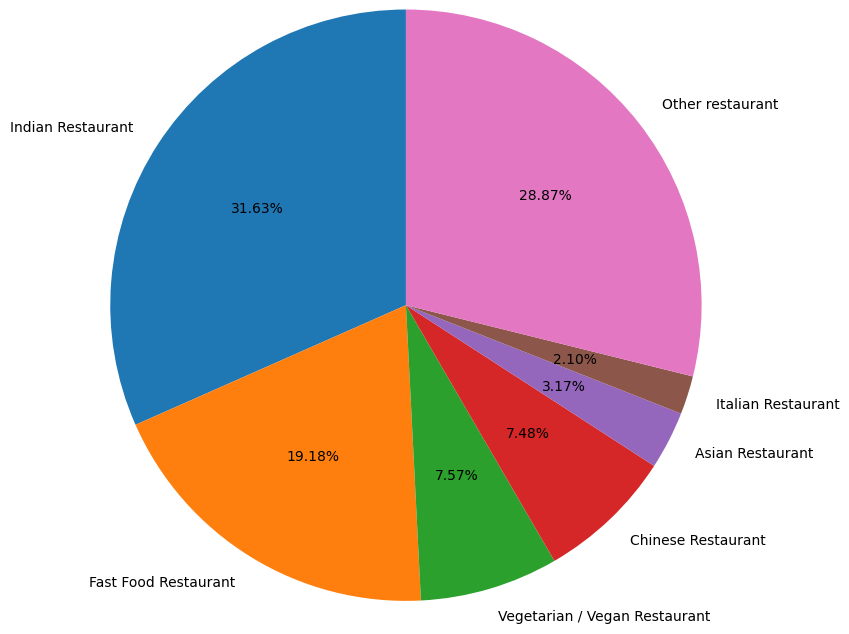

In [ ]:
x = np.append(cluster1_restaurant[target_restaurant].sum().values, cluster1_restaurant['Restaurant fraction'].sum()-cluster1_restaurant[target_restaurant].sum().sum())*100
labels = np.append(cluster1_restaurant[target_restaurant].sum().index, 'Other restaurant')
plt.pie(x=x, labels=labels, radius=2, startangle=90, autopct="%.2f%%");

Based on the above data, the following insights are concluded. We will target only the neighborhood with less than 20% of restaurant, suitable for opening any type of restaurant, but not already established restaurant.

**Any type of restaurant**

* Ayanavaram,Kodungaiyur, Korattur, Kundrathur, Manali New Town, Minjur, Moolakadai, Mudichur, Pammal, Pattabiram, Pattaravakkam, Perumbakkam, Perungalathur, Poonamallee, Puzhal, Sholavaram, Vandalur (preferably Indian)

* Chitlapakkam, Kottur, Madambakkam, Mannady, Nanganallur, Selaiyur, Sholinganallur, Thiruneermalai (except Indian)

* Perambur (except Chinese)

* Peravallur (except Asian)


#### Cluster 2

In [ ]:
cluster2 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 2].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster2

<ipython-input-140-5557050c5a55>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster2 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 2].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Pizza Place,Café,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Rock Club,Ice Cream Shop,North Indian Restaurant,Bookstore
1,Avadi,Indian Restaurant,Breakfast Spot,IT Services,Department Store,Park,ATM,New American Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex
2,Besant Nagar,Indian Restaurant,Café,Ice Cream Shop,Coffee Shop,South Indian Restaurant,Sandwich Place,Bistro,Park,New American Restaurant,Beach
3,Chepauk,Indian Restaurant,Train Station,Beach,Cricket Ground,Vegetarian / Vegan Restaurant,Seafood Restaurant,Light Rail Station,Platform,Performing Arts Venue,Pharmacy
4,Chetput,Indian Restaurant,Bakery,Café,Coffee Shop,Chinese Restaurant,Vegetarian / Vegan Restaurant,Department Store,Concert Hall,Clothing Store,Hotel
5,Chintadripet,Indian Restaurant,Train Station,Hotel,Café,Farmers Market,Bookstore,Movie Theater,Vegetarian / Vegan Restaurant,Flea Market,Electronics Store
6,Choolai,Indian Restaurant,Soccer Stadium,Food,ATM,New American Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School
7,Choolaimedu,Indian Restaurant,Gym,Ice Cream Shop,Fast Food Restaurant,Bakery,Restaurant,Asian Restaurant,Train Station,Mobile Phone Shop,Juice Bar
8,Chrompet,Indian Restaurant,Clothing Store,Department Store,Bakery,Fast Food Restaurant,Movie Theater,Breakfast Spot,Shopping Mall,Big Box Store,Men's Store
9,Egmore,Indian Restaurant,Hotel,Café,Department Store,Pizza Place,Bowling Alley,Shopping Mall,Snack Place,Museum,Sandwich Place


In [ ]:
Counter(cluster2.to_numpy().flatten()).most_common(10)

[('Indian Restaurant', 42),
 ('Movie Theater', 24),
 ('Multicuisine Indian Restaurant', 23),
 ('Multiplex', 20),
 ('Museum', 16),
 ('New American Restaurant', 14),
 ('Motel', 13),
 ('ATM', 12),
 ('Vegetarian / Vegan Restaurant', 11),
 ('Music School', 11)]

Cluster 2 is full of restaurant and other food shop. Opening a new restaurant in already established market is not a good idea. But, further analysis can uncover some useful information.

In [ ]:
cluster2_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 2].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster2_restaurant.insert(1, 'Restaurant fraction', cluster2_restaurant.sum(axis=1))

cluster2_restaurant

<ipython-input-202-55e0308b4f99>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster2_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 2].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
<ipython-input-202-55e0308b4f99>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster2_restaurant.insert(1, 'Restaurant fraction', cluster2_restaurant.sum(axis=1))


,Neighborhood,Restaurant fraction,Indian Restaurant,Vegetarian / Vegan Restaurant,North Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant,Asian Restaurant,...,Southern / Soul Food Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Curry Restaurant,Portuguese Restaurant,Hyderabadi Restaurant,Andhra Restaurant,Rajasthani Restaurant,Steakhouse,Russian Restaurant
0,Adyar,0.492958,0.225352,0.028169,0.028169,0.042254,0.042254,0.014085,0.014085,0.042254,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Avadi,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,Basin Bridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,Chepauk,0.428571,0.285714,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,Chetput,0.512195,0.243902,0.048780,0.000000,0.048780,0.024390,0.000000,0.000000,0.024390,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,Chintadripet,0.300000,0.250000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,Choolai,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,Choolaimedu,0.400000,0.200000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,Chrompet,0.318182,0.227273,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,Egmore,0.395833,0.208333,0.000000,0.000000,0.000000,0.020833,0.020833,0.020833,0.020833,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
cluster2_restaurant[['Neighborhood', 'Restaurant fraction'] + target_restaurant]

,Neighborhood,Restaurant fraction,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
0,Adyar,0.492958,0.225352,0.042254,0.028169,0.042254,0.042254,0.014085
1,Avadi,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
2,Basin Bridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chepauk,0.428571,0.285714,0.000000,0.071429,0.000000,0.000000,0.000000
4,Chetput,0.512195,0.243902,0.024390,0.048780,0.048780,0.024390,0.000000
5,Chintadripet,0.300000,0.250000,0.000000,0.050000,0.000000,0.000000,0.000000
6,Choolai,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
7,Choolaimedu,0.400000,0.200000,0.066667,0.000000,0.000000,0.066667,0.000000
8,Chrompet,0.318182,0.227273,0.045455,0.000000,0.000000,0.000000,0.000000
9,Egmore,0.395833,0.208333,0.020833,0.000000,0.000000,0.020833,0.020833


In [ ]:
cluster2_restaurant[target_restaurant].mean()

Indian Restaurant                0.222296
Fast Food Restaurant             0.020409
Vegetarian / Vegan Restaurant    0.029520
Chinese Restaurant               0.011106
Asian Restaurant                 0.016630
Italian Restaurant               0.006222
dtype: float64

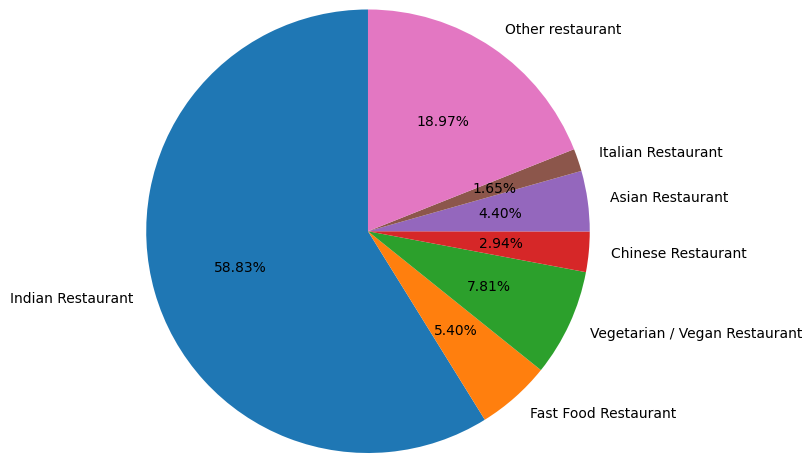

In [ ]:
x = np.append(cluster2_restaurant[target_restaurant].sum().values, cluster2_restaurant['Restaurant fraction'].sum()-cluster2_restaurant[target_restaurant].sum().sum())*100
labels = np.append(cluster2_restaurant[target_restaurant].sum().index, 'Other restaurant')
plt.pie(x=x, labels=labels, radius=1.5, startangle=90, autopct="%.2f%%");

Based on the above data, the following insights are concluded. We will target only the neighborhood with less than 20% of restaurant, suitable for opening any type of restaurant, but not already established restaurant.


**Any type of restaurant** (preferably Indian)
  * Basin Bridge
  * Chepauk
  * K.K. Nagar
  * Tambaram
  * Mudichur
  * MGR Nagar
  * Mangadu
  * Manali

**Fast Food, Chinese, Asian and Italian restaurant**
* Kattivakkam (also Vegetarian)
* Mangadu (also Indian)



#### Cluster 3

In [ ]:
cluster3 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 3].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster3

<ipython-input-206-2092565c9eb0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster3 = chennai_merged.loc[chennai_merged['Cluster Labels'] == 3].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mangadu,Pharmacy,ATM,Nightclub,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store
1,MGR Nagar,Pharmacy,ATM,Nightclub,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store
2,Sithalapakkam,Pharmacy,ATM,Nightclub,Motel,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music School,Music Store


In [ ]:
Counter(cluster3.to_numpy().flatten()).most_common(10)

[('Pharmacy', 3),
 ('ATM', 3),
 ('Nightclub', 3),
 ('Motel', 3),
 ('Movie Theater', 3),
 ('Multicuisine Indian Restaurant', 3),
 ('Multiplex', 3),
 ('Museum', 3),
 ('Music School', 3),
 ('Music Store', 3)]

Cluster 3 is very similar to Cluster 0 with negligible restaurant density,Opening a new restaurant in this cluster can be profitable

In [ ]:
cluster3_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 3].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
cluster3_restaurant.insert(1, 'Restaurant fraction', cluster3_restaurant.sum(axis=1))

cluster3_restaurant

<ipython-input-208-0d451cc37ed6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cluster3_restaurant = chennai_restaurant_density.loc[chennai_restaurant_density['Cluster Labels'] == 3].drop(['Latitude', 'Longitude', 'Cluster Labels'], 1).reset_index(drop=True)
<ipython-input-208-0d451cc37ed6>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster3_restaurant.insert(1, 'Restaurant fraction', cluster3_restaurant.sum(axis=1))


,Neighborhood,Restaurant fraction,Indian Restaurant,Vegetarian / Vegan Restaurant,North Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant,Asian Restaurant,...,Southern / Soul Food Restaurant,Bengali Restaurant,Burmese Restaurant,Japanese Curry Restaurant,Portuguese Restaurant,Hyderabadi Restaurant,Andhra Restaurant,Rajasthani Restaurant,Steakhouse,Russian Restaurant
0,Madhavaram,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Medavakkam,0.777778,0.444444,0.222222,0.0,0.111111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sithalapakkam,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cluster3_restaurant[['Neighborhood', 'Restaurant fraction'] + target_restaurant]

,Neighborhood,Restaurant fraction,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
0,Madhavaram,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,Medavakkam,0.777778,0.444444,0.0,0.222222,0.111111,0.0,0.0
2,Sithalapakkam,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
cluster3_restaurant[cluster3_restaurant['Restaurant fraction'] <= .2][['Neighborhood', 'Restaurant fraction'] + target_restaurant]

,Neighborhood,Restaurant fraction,Indian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
0,Madhavaram,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sithalapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cluster3_restaurant[target_restaurant].mean()

Indian Restaurant                0.148148
Fast Food Restaurant             0.000000
Vegetarian / Vegan Restaurant    0.074074
Chinese Restaurant               0.037037
Asian Restaurant                 0.000000
Italian Restaurant               0.000000
dtype: float64

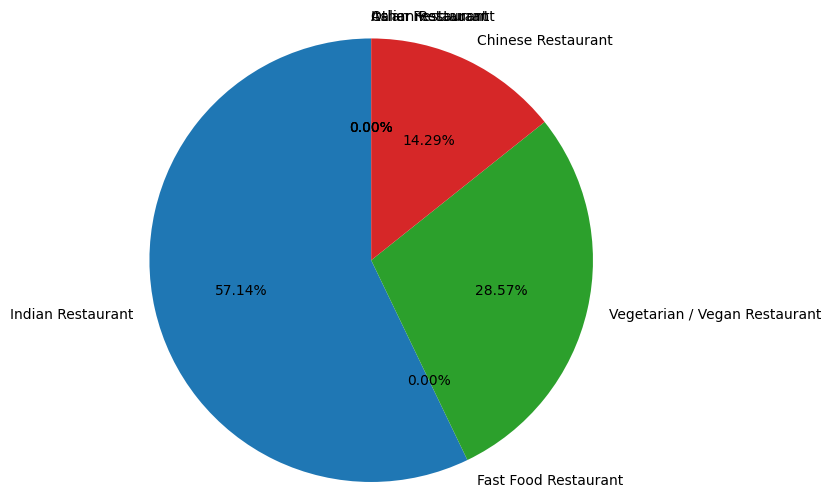

In [ ]:
x = np.append(cluster3_restaurant[target_restaurant].sum().values, cluster3_restaurant['Restaurant fraction'].sum()-cluster3_restaurant[target_restaurant].sum().sum())
labels = np.append(cluster3_restaurant[target_restaurant].sum().index, 'Other restaurant')
plt.pie(x=x, labels=labels, radius=1.5, startangle=90, autopct="%.2f%%");

Based on the above data, the following insights are concluded. We will target only the neighborhood with less than 20% of restaurant, suitable for opening any type of restaurant, but not already established restaurant.

**Any type of restaurant** (preferably Indian)

* Madhavaram
* Sithalapakkam

This cluster has no Fast Food restaurant, Italian restaurant and other restaurant. Opening these types of restaurants is done after properly analyzing the area and people.

## Results <a name="results"></a>

The summary of our analysis are,

* We categorized the neighbors using **K-means clustering** algorithm based on the density of venues.

* We chose **4 clusters** which is optimal according **Silhouette Coefficient** of finding optimal cluster.



* **Cluster 0** - High market density with fewer medium popular restaurant type - **60%** of the area has promising opportunity for opening a new restaurant - This cluster has no Asian and Italian restaurant.

* **Cluster 1** - High restaurant density, very similar to Cluster 02- **26%** of the area has opportunity to open new restaurant.

* **Cluster 2** - Full of restaurant and other food shop - only **23%** of the areas has opportunity to open new restaurant.

* **Cluster 3** - Negligible restaurant density - Out of 3 areas, **2 areas** do not have a single restaurant.



## Conclusion and Discussion <a name="conclusion"></a>

The purpose of this project was to identify the optimal location for opening some of the popular restaurant type namely, Indian, Fast Food, Vegetarian, Chinese, Asian and Italian restaurant. Factors like venue density distribution are used to achieve our task.

First, we scraped the neighborhood information of Chennai city from the Wikipedia website and used python’s geocoder library to get the coordinate information of each of the neighborhoods. Then, we utilized Foursquare data to fetch and identify all the venues within each neighborhood. We then clustered the neighborhood based on the venue density. Each cluster provided useful information and insights about the venues and restaurants that are briefly discussed in analysis and result section, that are helpful for the stakeholders.

We can also apply the same approach for the larger dataset. This approach can also be applied to identify promising location for shopping malls, movie theaters and other related business. In this project, we considered only one factor, that is, venue density distribution. There are some other most useful factors like population and income of residents, real estate availability, surrounding localities, financial report etc., can be really helpful to further narrow down the choice of selecting the optimal location by the stakeholders based on specific characteristics of neighborhoods and locations.

Final decision on selecting the optimal location for the restaurant will be made by stakeholders based on specific characteristics of neighborhoods and locations in every area, taking additional factors into consideration that are discussed above.